In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.integrate
import scipy.stats
from scipy import misc
from scipy.optimize import minimize
from matplotlib import pyplot as plt

### Brief Intro to the Mechanics of Numerical Optimization

Newton's Method for Root Finding

<img src="newtons_method_zeros.gif">

Newton's Method vs Gradient Descent for Minimization (Maximization)

<img src="newtons_method_gradient_descent.gif">

In [2]:
from scipy.optimize import minimize
data = np.array(
  [[0.0000, 5.8955], 
   [0.1000, 3.5639],
   [0.2000, 2.5173],
   [0.3000, 1.9790],
   [0.4000, 1.8990],
   [0.5000, 1.3938],
   [0.6000, 1.1359],
   [0.7000, 1.0096],
   [0.8000, 1.0343],
   [0.9000, 0.8435],
   [1.0000, 0.6856],
   [1.1000, 0.6100],
   [1.2000, 0.5392],
   [1.3000, 0.3946],
   [1.4000, 0.3903],
   [1.5000, 0.5474],
   [1.6000, 0.3459],
   [1.7000, 0.1370],
   [1.8000, 0.2211],
   [1.9000, 0.1704],
   [2.0000, 0.2636]])

def plot_against_data(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    plt.plot(tgrid, ydata, '.')
    plt.plot(tgrid, y)
    
x_initial = np.array([1, 1, 1, 0])

 - (1): Use the given plotting function to plot the data and the curve for the given initial guess of the parameters, `x_initial`.

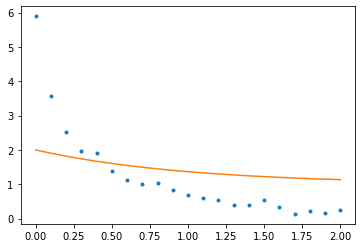

In [3]:
plot_against_data(x_initial)

In [4]:
import ipywidgets

def interactive_plot(x0=1.,x1=2.,x2=1.,x3=0.):
    plot_against_data(np.array([x0,x1,x2,x3]))

In [5]:
ipywidgets.interact(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='x0', max=3.0, min=-1.0), FloatSlider(value=2.0, desc…

<function __main__.interactive_plot(x0=1.0, x1=2.0, x2=1.0, x3=0.0)>

 - (2) Write a function called `sum_squares` that takes in a vector of model paraters (e.g., `x_initial`) and returns the sum of squares that results from the difference of the data and the curve defined by `x_initial`. What is the sum of squares that results from the given `x_initial`?

In [6]:
def sum_squares(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    s = np.sum((y - ydata)**2)
    return s

In [7]:
sum_squares(x_initial)

27.432326688864467

 - (3) Use `scipy.optimize.minimize` to minimize the sum of squares, using the function that you wrote previously. Save the optimal parameters to the variable `xstar`.

In [8]:
opt = minimize(sum_squares, x_initial)
xstar = opt.x
xstar

array([ 3.00689941,  2.88903268, 10.58641832,  1.40031742])

 - (4) Use the `plot_against_data` function that was given to plot the optimal curve, defined by `xstar`, against the data.

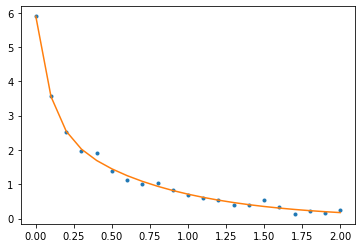

In [9]:
plot_against_data(xstar)